<a href="https://colab.research.google.com/github/kaiser1711/stable-diffusion/blob/main/Stable_diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Running Text to Image using words from Harry Potter book

In [2]:
!pip install diffusers==0.4.0 transformers scipy ftfy
!pip install -q git+https://github.com/huggingface/transformers.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 229 kB 31.2 MB/s 
     |████████████████████████████████| 5.3 MB 6.5 MB/s 
     |████████████████████████████████| 53 kB 1.8 MB/s 
     |████████████████████████████████| 163 kB 72.9 MB/s 
     |████████████████████████████████| 7.6 MB 54.4 MB/s 


Token from Huggingface

In [5]:
YOUR_TOKEN=""

In [6]:
from diffusers import StableDiffusionPipeline
from IPython.display import Image

# get your token at https://huggingface.co/settings/tokens
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", use_auth_token=YOUR_TOKEN)


Downloading:   0%|          | 0.00/543 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/209 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/230 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/592 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/492M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/472 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/806 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/743 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/522 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/335M [00:00<?, ?B/s]

Activate CUDA

In [7]:
pipe.to("cuda")

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.4.0",
  "feature_extractor": [
    "transformers",
    "CLIPFeatureExtractor"
  ],
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

## Test a promt

In [8]:
prompt = "beautiful, magnificent color matching, realistic painting, concept art, long exposure, ultra-HD, 8K"

image = pipe(prompt)["sample"][0]

  0%|          | 0/51 [00:00<?, ?it/s]

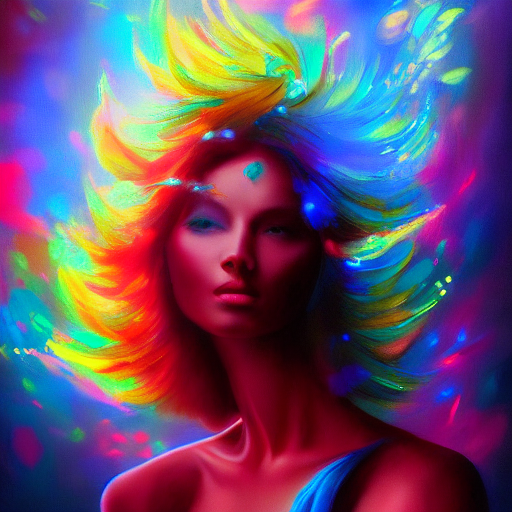

In [9]:
image.save(f"test.png")
Image(filename='test.png') 

## Import Text libraries and download Harry Potter text

In [10]:
import nltk
nltk.download('omw-1.4')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
assert(nltk.download('wordnet'))  # Make sure we have the wordnet data.
from nltk.corpus import wordnet as wn
from nltk.corpus import words
from random import sample
import requests
import random
import collections

response = requests.get('https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%201%20-%20The%20Philosopher\'s%20Stone.txt')
open("harry.txt", "wb").write(response.content)
  
# Open the file in read mode
with open("harry.txt", "r") as file:
    allText = file.read()
    harry = list(map(str, allText.split()))

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


## Extract most used words from Harry Potter books

In [11]:
# Read input file, note the encoding is specified here 
# It may be different in your text file
file = open('harry.txt', encoding="utf8")
a= file.read()
# Stopwords
stopwords = set(['mr','mrs','one','two','said', 'the','a','to','he','was','his','her'])
# Instantiate a dictionary, and for every word in the file, 
# Add to the dictionary if it doesn't exist. If it does, increase the count.
wordcount = {}
# To eliminate duplicates, remember to split by punctuation, and use case demiliters.
for word in a.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in stopwords:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1

n_print = 1000 #How many words to look at? 
word_counter = collections.Counter(wordcount)
common_harry_word_list=list()
for word, count in word_counter.most_common(n_print): #most common
#for word, count in  word_counter.most_common()[len(word_counter.most_common())-n_print:-1]: #least common
    common_harry_word_list.append(word)

## Randomly draw nouns and adjectives for prompt & add some styles at the end

A low home next to a easy cloak , beautiful, magnificent color matching, realistic painting, concept art, long exposure, ultra-HD, 8K


  0%|          | 0/51 [00:00<?, ?it/s]

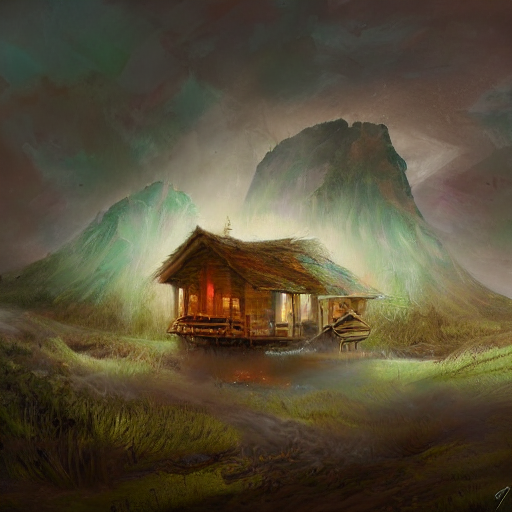

In [12]:
wordlist=common_harry_word_list
n_noun = 1
n_adjective=1
string = list('A')

nn=0 
while nn<n_adjective:
  #w=sample(words.words(), 1)
  w=random.choice(wordlist)
  s=nltk.pos_tag([w])
  if "!" in w or "|" in w or ";" in w or "—" in w or "’" in w or "“" in w or "”" in w or "?" in w or "," in w or "\"" in w or "." in w:
    continue;
  #print(w,s[0][1])
  if s[0][1]=='JJ':
    string.append(str(w).lower())
    nn=nn+1;

nn=0        
while nn<n_noun:
  #w=sample(words.words(), 1)
  w=random.choice(wordlist)
  s=nltk.pos_tag([w])
  #print(w,s[0][1])
  if "!" in w or "|" in w or ";" in w or"—" in w or "’" in w or "“" in w or "”" in w or "?" in w or "," in w or "\"" in w or "." in w:
    continue;
  if s[0][1]=='NN':
    string.append(str(w).lower())
    nn=nn+1;

string.append('next to a')

nn=0 
while nn<n_adjective:
  #w=sample(words.words(), 1)
  w=random.choice(wordlist)
  s=nltk.pos_tag([w])
  if "!" in w or "|" in w or ";" in w or "—" in w or "’" in w or "“" in w or "”" in w or "?" in w or "," in w or "\"" in w or "." in w:
    continue;
  #print(w,s[0][1])
  if s[0][1]=='JJ':
    string.append(str(w).lower())
    nn=nn+1;

nn=0        
while nn<n_noun:
  #w=sample(words.words(), 1)
  w=random.choice(wordlist)
  s=nltk.pos_tag([w])
  #print(w,s[0][1])
  if "!" in w or "|" in w or ";" in w or"—" in w or "’" in w or "“" in w or "”" in w or "?" in w or "," in w or "\"" in w or "." in w:
    continue;
  if s[0][1]=='NN':
    string.append(str(w).lower())
    nn=nn+1;

string.append(',')
string.append(prompt)

string=" ".join(string)
print(string)
image = pipe(string)["sample"][0]
image.save(f"test.png")
Image(filename='test.png') 

## Load GPT-2 for text generation

In [14]:
import tensorflow as tf
from transformers import TFGPT2LMHeadModel, GPT2Tokenizer


tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# add the EOS token as PAD token to avoid warnings
model = TFGPT2LMHeadModel.from_pretrained("gpt2", pad_token_id=tokenizer.eos_token_id)

Downloading:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/498M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFGPT2LMHeadModel.

All the layers of TFGPT2LMHeadModel were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


## Generate text

In [15]:
# encode context the generation is conditioned on
input_ids = tokenizer.encode('I enjoy walking with my cute dog', return_tensors='tf')

# generate text until the output length (which includes the context length) reaches 50
greedy_output = model.generate(input_ids, max_length=50)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(greedy_output[0], skip_special_tokens=True))

Output:
----------------------------------------------------------------------------------------------------
I enjoy walking with my cute dog, but I'm not sure if I'll ever be able to walk with my dog. I'm not sure if I'll ever be able to walk with my dog.

I'm not sure if I'll


## Generate random seed for GPT-2 and feed it into Diffuser

Random seed: "A powerful deep"
GPT-2 Output:

A powerful deep-sea oil spill in the Gulf of Mexico has killed at


  0%|          | 0/51 [00:00<?, ?it/s]

Diffuser output image:



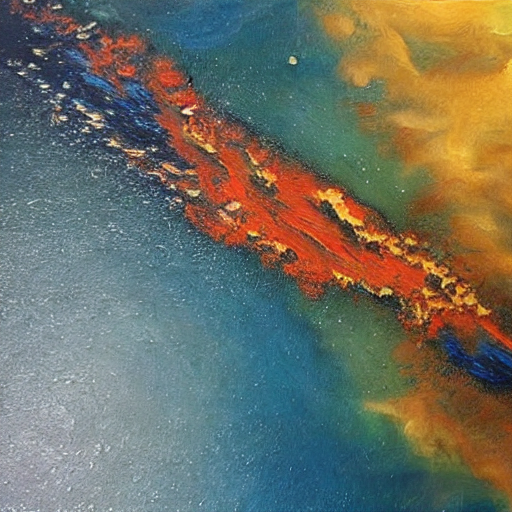

In [47]:
wordlist=common_harry_word_list
n_noun = 1
n_adjective=1
string = list('A')

nn=0 
while nn<n_adjective:
  #w=sample(words.words(), 1)
  w=random.choice(wordlist)
  s=nltk.pos_tag([w])
  if "!" in w or "|" in w or ";" in w or "—" in w or "’" in w or "“" in w or "”" in w or "?" in w or "," in w or "\"" in w or "." in w:
    continue;
  #print(w,s[0][1])
  if s[0][1]=='JJ':
    string.append(str(w).lower())
    nn=nn+1;

nn=0        
while nn<n_noun:
  #w=sample(words.words(), 1)
  w=random.choice(wordlist)
  s=nltk.pos_tag([w])
  #print(w,s[0][1])
  if "!" in w or "|" in w or ";" in w or"—" in w or "’" in w or "“" in w or "”" in w or "?" in w or "," in w or "\"" in w or "." in w:
    continue;
  if s[0][1]=='NN':
    string.append(str(w).lower())
    nn=nn+1;

#string.append('next to a')

#nn=0 
#while nn<n_adjective:
  #w=sample(words.words(), 1)
#  w=random.choice(wordlist)
#  s=nltk.pos_tag([w])
#  if "!" in w or "|" in w or ";" in w or "—" in w or "’" in w or "“" in w or "”" in w or "?" in w or "," in w or "\"" in w or "." in w:
#    continue;
  #print(w,s[0][1])
#  if s[0][1]=='JJ':
#    string.append(str(w).lower())
#    nn=nn+1;


string=" ".join(string)
print("Random seed: \""+ string + "\"")


input_ids = tokenizer.encode(string, return_tensors='tf')


# generate text until the output length (which includes the context length) reaches 50
greedy_output = model.generate(input_ids, max_length=15)

print("GPT-2 Output:\n")
print(tokenizer.decode(greedy_output[0], skip_special_tokens=True))

added_string=" , realistic painting, concept art" 

image = pipe(tokenizer.decode(greedy_output[0], skip_special_tokens=True) + added_string)["sample"][0]
#image = pipe(tokenizer.decode(greedy_output[0], skip_special_tokens=True) + prompt)["sample"][0]

print("Diffuser output image:\n")
image.save(f"test.png")
Image(filename='test.png') 